## Convolutional Neural Networks


### Why ConvNets?

When we trained our a fully connected Dense Neural Network on the fashion MNIST dataset, we could not reach the mark of 90% accuracy, even after increasing the number of neurons. That was due to many reasons:
  - Alot of space in the images did not distinguish it from the other images. For example, consider an image of the shoe, most of the area in the image above and below the shoe are just a waste of space. Our Neural Net doesn't learn anything significant from those empty spaces.
  - The fashion accessories can be distinguished easily if our Neural Net is able to learn the most important features of each of the images. For eg. if the net learned that shoe laces belong to shoes and handles relate to bags. Then it would be very easy for the net to classify.
  - For the above to happen it would be better if we extracted the features from the images and gave it to the Neural Net.
  
  For the above benefits we implement in our models what is called as Convolutional Layers and pooling layers. These layers apply filters on the images to extract the most important features of the image. The pooling layers reduce the size of the image by again extracting the most important features of the image.
  

### Why I am not implementing the Convolutional Neural Net from Scratch

The ***forward propagation part of the convNets is easy and implementable from scratch***.

But the ***backpropagation part of the ConvNets is quite INVOLVED and it's not a good idea to implement them from scratch***.

So I will use ***Tensorflow*** , a deep learning framework to implement the convNet.

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

1.13.1


### Importing dataset

In [10]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


### Feature Scaling

In [0]:
X_train = X_train/255
X_test = X_test/255

### Training the model

Since we are dealing with only gray scale images, the number of colour channels we have is only 1. 
Hence we need to resahpe the X_train and X_test to reflect that.

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units=128, activation='relu'),
tf.keras.layers.Dense(units=10, activation='softmax')])

#### A very helpful function is model.summary()

It gives all the information about the model

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.4407 - acc: 0.8420
Epoch 2/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2960 - acc: 0.8917
Epoch 3/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2494 - acc: 0.9086
Epoch 4/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2170 - acc: 0.9191
Epoch 5/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1919 - acc: 0.9280


## Accuracy

Hence we see that we achieve an accuracy of ***93%*** on the training dataset.

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.2659 - acc: 0.9050


In [17]:
print(test_accuracy*100)

90.49999713897705


Hence we easily approach a test accuracy of ***90.72%*** on the test dataset for just 5 epochs.

Now let us find out the best number of epochs.

## Epochs vs. Accuracy

In [0]:
def best_epoch(epochs):
  
  Train_acc = []
  Train_loss = []
  Test_acc = []
  Test_loss = []
  
  for e in epochs:
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, Y_train, epochs=e)
    test_loss, test_acc = model.evaluate(X_test, Y_test)
    
    Train_acc.append(history.history['acc'][e-1]*100)
    Train_loss.append(history.history['loss'][e-1])
    
    Test_loss.append(test_loss)
    Test_acc.append(test_acc*100)
    
  return Train_loss, Train_acc, Test_loss, Test_acc

In [0]:
epochs = [5,6,7,8,9,10,11,12]
train_loss, train_acc, test_loss, test_acc = best_epoch(epochs)

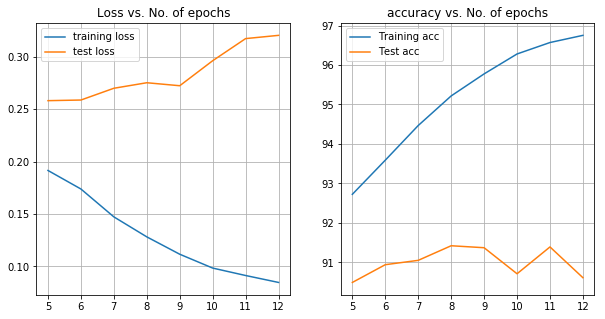

In [29]:
fig, ax = plt.subplots(nrows=1,ncols=2)
fig.set_figwidth(10)
fig.set_figheight(5)

ax[0].plot(epochs, train_loss, label='training loss')
ax[0].plot(epochs, test_loss, label='test loss')
ax[0].set_title('Loss vs. No. of epochs')
ax[0].legend()
ax[0].grid()

ax[1].plot(epochs, train_acc, label='Training acc')
ax[1].plot(epochs, test_acc, label='Test acc')
ax[1].set_title('accuracy vs. No. of epochs')
ax[1].legend()
ax[1].grid()

As the number of epoch increases, the model tends to overfit the dataset, so the training accuracy increases and test accuracy decreases.

At epochs = 8, we have the highest test accuracy.

In [31]:
acc = np.array(test_acc)
max_acc_epoch = np.argmax(acc)
print('Test accuracy is max at',max_acc_epoch+5,'epochs. It is',test_acc[max_acc_epoch])

Test accuracy is max at 8 epochs. It is 91.42000079154968


Hence an accuracy of ***91.42%*** is achieved on the test dataset.

### Analyzing the convolutions

Let's analyze what happens to the input image as it passes through the convolutional and pooling layers, to understand more about those layers and there operations.

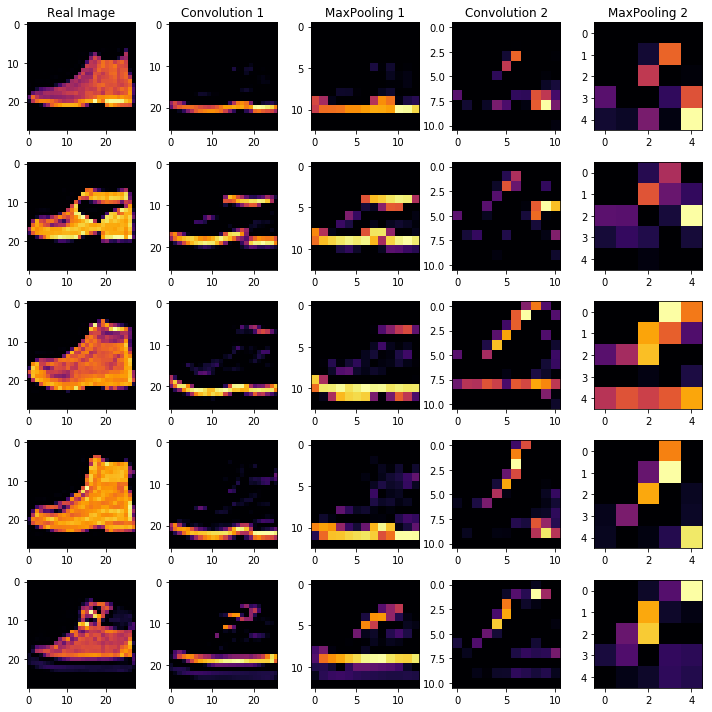

In [41]:
NO_OF_IMAGES = 5
CONVOLUTION_NUMBER = 3
IMAGE_INDEX = 9
NO_OF_LAYERS = 4

#extracting images from first 200 images of test dataset
images = np.where(Y_test[:200]==IMAGE_INDEX)[0][:NO_OF_IMAGES]
n = len(images)

fig, axarr = plt.subplots(n, 5)
fig.set_figheight(n*2)
fig.set_figwidth(10)

#constructing model
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for i in range(n):
  
  axarr[i,0].imshow(X_test[images[i]].reshape(28,28), cmap='inferno')
  
  #drawing the intermediate layers
  for j in range(NO_OF_LAYERS):
    f = activation_model.predict(X_test[images[i]].reshape(1, 28, 28, 1))[j]
    axarr[i,j+1].imshow(f[0, : , :,CONVOLUTION_NUMBER], cmap='inferno')
    axarr[i,j+1].grid(False)
  
  
#headings
layers = ["Real Image","Convolution 1","MaxPooling 1","Convolution 2","MaxPooling 2"]
for i,layer in enumerate(layers):
  axarr[0,i].set_title(layer)
  
fig.tight_layout()

So, this is how the ConvNet processes the images and feeds it into the Dense Neural Net to learn features.

- Note how the dimension of images decrease as it is processed by every layer. It decreases from 28 to 26 to 13 to 11 and to  5.

- These are the images for the ***KERNEL/FILTER = 3*** of every layer.*** We observe that the front portion of the Ankle boot gets highlighted in the above filters.***

- You can learn more about these layers by changing the CONVOLUTION_NUMBER above to see the features learned by a different KERNEL/FILTER.

- You can also change the IMAGE_INDEX to see how other fashion items are processed by the ConvNet. Here is a cheat sheet for other index and fashion item in the fashion-mnist datset.

    -  0 T-shirt/top
    - 1 Trouser
    -  2 Pullover
    -  3 Dress
    - 4 Coat
    -  5 Sandal
    -  6 Shirt
    -  7 Sneaker
    -  8 Bag
    -  9 Ankle boot


Play along with it.